In [1]:
# 使用最小二乘法拟合函数目标函数y=sin2πx,加上一个正太分布的噪音干扰
%matplotlib inline

import numpy as np
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [2]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
# ps: numpy.poly1d([1,2,3])生成 1x^2+2x^1+3x^0
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret



In [3]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪声的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    '''
    M为多项式次数
    '''
    # 随机初始化多项式的参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.05128462]


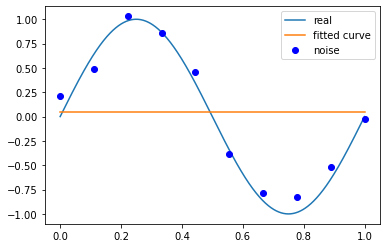

In [4]:
# M = 0
p_lsq_0 = fitting(0)


Fitting Parameters: [-1.32136827  0.71196875]


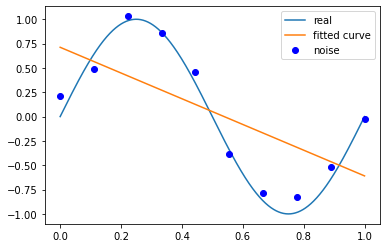

In [5]:
# M = 1
p_lsq_1 = fitting(1)

Fitting Parameters: [ 0.11059555 -1.43196382  0.72835327]


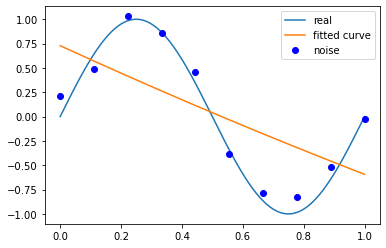

In [6]:
# M = 3
p_lsq_3 = fitting(2)

Fitting Parameters: [-2.83786782e+04  1.29683352e+05 -2.49230658e+05  2.61673632e+05
 -1.63158462e+05  6.14738938e+04 -1.35741851e+04  1.57971265e+03
 -6.88436150e+01  2.10512614e-01]


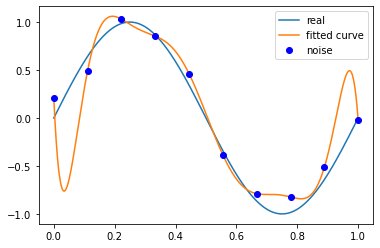

In [7]:
# M = 9
p_lsq_9 = fitting(9)


